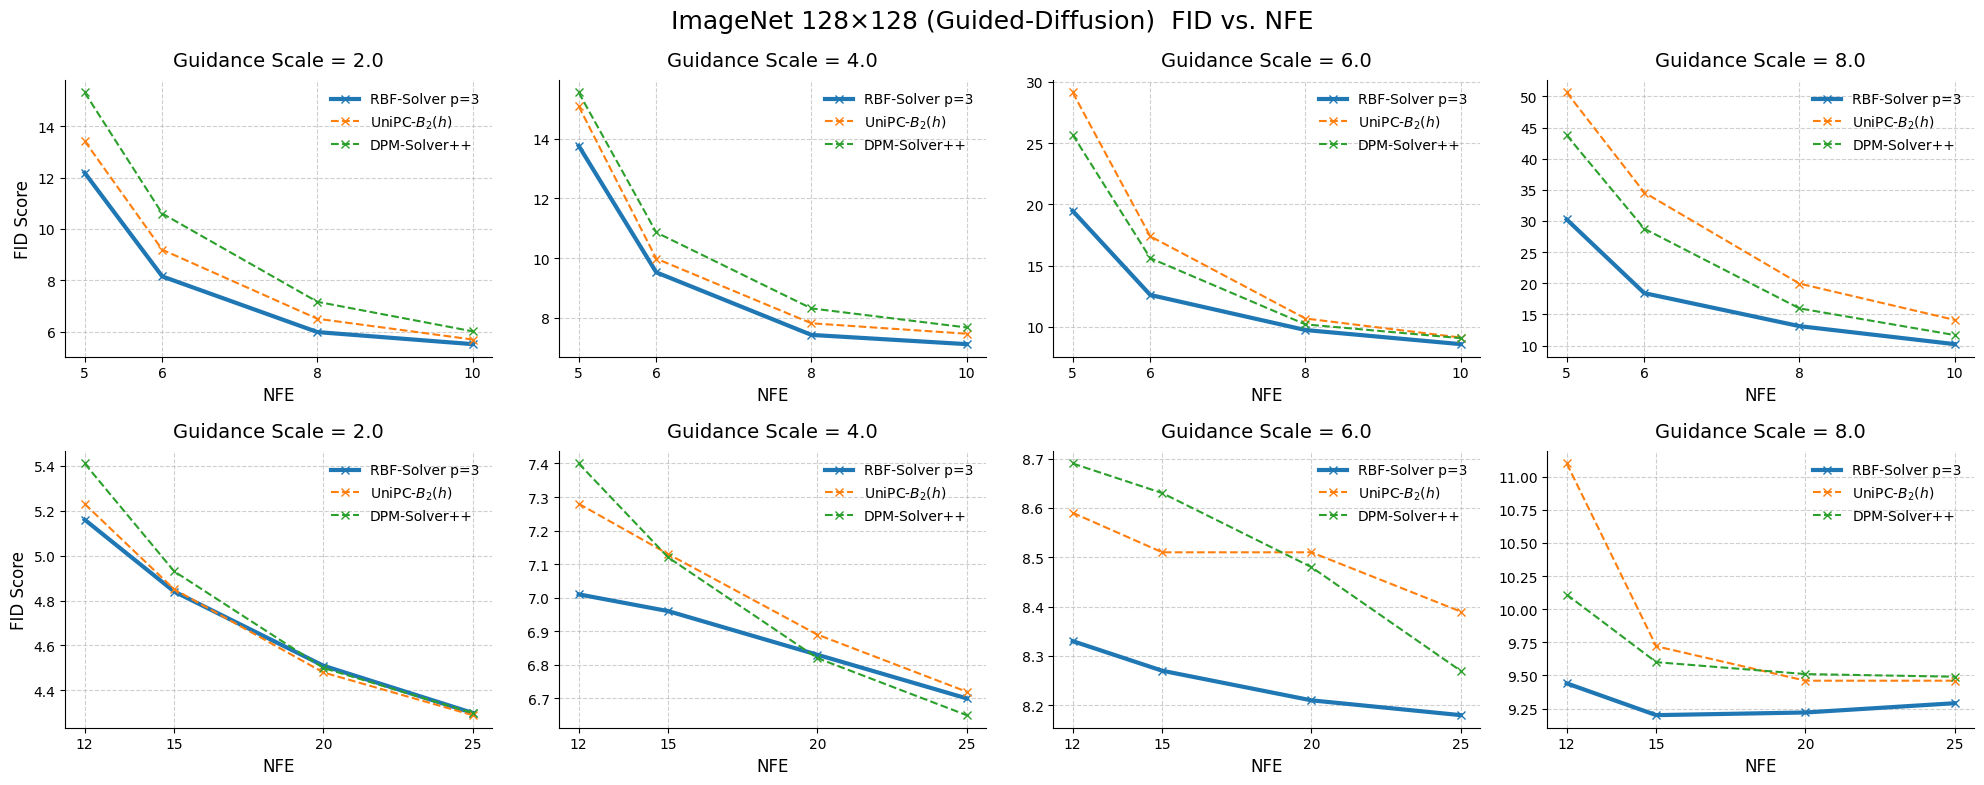

In [2]:
import matplotlib.pyplot as plt

# ---------- Global style ----------
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.6,
    'axes.spines.top': False,
    'axes.spines.right': False,
})

# ---------- NFE & scales ----------
nfe_small = [5, 6, 8, 10]
nfe_large = [12, 15, 20, 25]
scales = [2.0, 4.0, 6.0, 8.0]

# ---------- FID data (ImageNet 128×128) ----------
full_data = {
    2.0: {
        'DPM-Solver++':  [15.32, 10.60,  7.16,  6.01,  5.41,  4.93,  4.50,  4.30],
        'UniPC-$B_2(h)$': [13.43,  9.19,  6.50,  5.69,  5.23,  4.85,  4.48,  4.29],
        'RBF-Solver p=2': [12.83,  8.80,  6.34,  5.61,  5.22,  4.85,  4.49,  4.28],
        'RBF-Solver p=3': [12.19,  8.15,  5.98,  5.51,  5.16,  4.84,  4.51,  4.30],
    },
    4.0: {
        'DPM-Solver++':  [15.56, 10.86,  8.31,  7.67,  7.40,  7.12,  6.82,  6.65],
        'UniPC-$B_2(h)$': [15.10,  9.98,  7.81,  7.46,  7.28,  7.13,  6.89,  6.72],
        'RBF-Solver p=2': [14.24,  9.66,  7.71,  7.40,  7.20,  7.11,  6.86,  6.72],
        'RBF-Solver p=3': [13.77,  9.52,  7.42,  7.11,  7.01,  6.96,  6.83,  6.70],
    },
    6.0: {
        'DPM-Solver++':  [25.67, 15.61, 10.21,  9.09,  8.69,  8.63,  8.48,  8.27],
        'UniPC-$B_2(h)$': [29.12, 17.39, 10.69,  9.14,  8.59,  8.51,  8.51,  8.39],
        'RBF-Solver p=2': [19.93, 12.28,  9.36,  8.68,  8.58,  8.48,  8.36,  8.29],
        'RBF-Solver p=3': [19.46, 12.61,  9.75,  8.60,  8.33,  8.27,  8.21,  8.18],
    },
    8.0: {
        'DPM-Solver++':  [43.76, 28.75, 15.96, 11.68, 10.11,  9.60,  9.51,  9.49],
        'UniPC-$B_2(h)$': [50.63, 34.56, 19.94, 14.11, 11.10,  9.72,  9.46,  9.46],
        'RBF-Solver p=2': [30.55, 17.87, 11.70, 10.35,  9.64,  9.43,  9.37,  9.40],
        'RBF-Solver p=3': [30.24, 18.41, 13.11, 10.22,  9.44,  9.20,  9.22,  9.29],
    },
}

# ---------- Plot style ----------
method_order = [
    'RBF-Solver p=3',
    #'RBF-Solver p=2',
    'UniPC-$B_2(h)$',
    'DPM-Solver++',
]

# ---------- Utility: dynamic y‑limits ----------
def _split_vals(vals): return vals[:4], vals[4:]
def _pad(lo, hi, p=0.05):
    span = hi - lo
    return lo - span * p, hi + span * p

small_ylims, large_ylims = {}, {}
for s in scales:
    small, large = [], []
    for m in method_order:
        sm, lg = _split_vals(full_data[s][m])
        small.extend(sm); large.extend(lg)
    small_ylims[s] = _pad(min(small), max(small))
    large_ylims[s] = _pad(min(large), max(large))

# ---------- Figure ----------
fig, axs = plt.subplots(2, 4, figsize=(20, 8))

# ----- Top row: small NFE -----
for idx, scale in enumerate(scales):
    ax = axs[0, idx]
    for method in method_order:
        vals = full_data[scale][method][:4]
        lw = 3 if method.startswith('RBF-Solver') else 1.5
        ls = '-' if method.startswith('RBF-Solver') else '--'
        ax.plot(nfe_small, vals, linestyle=ls, marker='x', linewidth=lw, label=method)
    ax.set_ylim(*small_ylims[scale])
    ax.set_title(f'Guidance Scale = {scale}', pad=10)
    ax.set_xlabel('NFE')
    if idx == 0:
        ax.set_ylabel('FID Score')
    ax.set_xticks(nfe_small)
    ax.legend(frameon=False, loc='upper right')

# ----- Bottom row: large NFE -----
for idx, scale in enumerate(scales):
    ax = axs[1, idx]
    for method in method_order:
        vals = full_data[scale][method][4:]
        lw = 3 if method.startswith('RBF-Solver') else 1.5
        ls = '-' if method.startswith('RBF-Solver') else '--'
        ax.plot(nfe_large, vals, linestyle=ls, marker='x', linewidth=lw, label=method)
    ax.set_ylim(*large_ylims[scale])
    ax.set_title(f'Guidance Scale = {scale}', pad=10)
    ax.set_xlabel('NFE')
    if idx == 0:
        ax.set_ylabel('FID Score')
    ax.set_xticks(nfe_large)
    ax.legend(frameon=False, loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('ImageNet 128×128 (Guided‑Diffusion)  FID vs. NFE', fontsize=18)
plt.show()


In [4]:
import numpy as np
np.load('/data/archive/dpmsolver++_20_scale2.0_order2/fid.npy')

array(7.4400317)